<a href="https://colab.research.google.com/github/Swasti1912/Data_Collection/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torchvision
from torchvision import transforms
import torch 
from torch import no_grad


In [37]:
import requests

In [38]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [39]:
def get_predictions(pred , threshold = 0.8 ,objects = None):
    """
    This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold 
    
    pred: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class yhat, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface
    predicted_classes: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    thre
    """
    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes  = [stuff for stuff in predicted_classes if stuff[1]> threshold]

    if objects and predicted_classes:
      predicted_classes = [(name,p,box) for name , p, box in predicted_classes if name in objects] 
    return predicted_classes

In [40]:
def draw_box(predicted_classes,image,rect_th= 10,text_size= 3,text_th=3):
  img=(np.clip(cv2.cvtColor(np.clip(image.numpy().transpose((1, 2, 0)),0,1), cv2.COLOR_RGB2BGR),0,1)*255).astype(np.uint8).copy()
  for predicted_class in predicted_classes:
    label = predicted_class[0]
    probability = predicted_class[1]
    box = predicted_class[2]

    cv2.rectangle(img, box[0], box[1],(0, 255, 0), rect_th)
    cv2.putText(img,label, box[0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) 
    cv2.putText(img,label+": "+str(round(probability,2)), box[0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
  del (img)
  del (image)


In [41]:
def save_Ram(image_ = False):
    global image, img, pred
    torch.cuda.empty_cache()
    del (img)
    del (image)
    if image_ :
      image.close()
      del (image)

In [43]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()
 
for name, param in model_.named_parameters():
  param.requires_grad = False
print("done")


done


In [44]:
def model(x):
  with torch.no_grad():
    yhat = model_(x)
  return yhat

In [45]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES) 

91

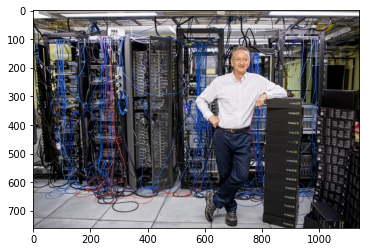

In [46]:
img_path='/Jeff_hinton.png'
half = 0.5
image = Image.open(img_path)

image.resize( [int(half * s) for s in image.size] )

plt.imshow(image)
plt.show()

In [47]:
transform = transforms.Compose([transforms.ToTensor()])

In [48]:
img = transform(image)    

In [49]:
pred = model([img]) 

In [50]:
pred[0]['labels'] 

tensor([ 1, 84, 72, 84, 84, 62, 84, 84, 35, 84, 84, 84,  1, 35, 84, 84, 35, 84,
        84, 82, 84,  8, 72, 62, 42])

In [51]:
pred[0]['scores'] 

tensor([0.9995, 0.2323, 0.2239, 0.2085, 0.2044, 0.1840, 0.1430, 0.1395, 0.1074,
        0.1054, 0.1006, 0.0885, 0.0824, 0.0794, 0.0752, 0.0751, 0.0662, 0.0622,
        0.0588, 0.0569, 0.0559, 0.0559, 0.0554, 0.0536, 0.0524])

In [52]:
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'person'

In [53]:
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box

[574.7069702148438, 143.46078491210938, 886.0980224609375, 723.5067138671875]

In [54]:
t,l,r,b=[round(x) for x in bounding_box]  

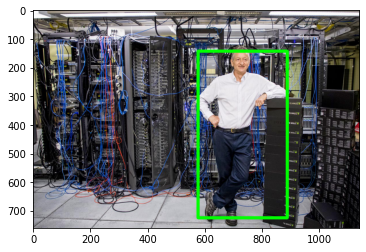

In [55]:
img_plot=(np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)),0,1), cv2.COLOR_RGB2BGR),0,1)*255).astype(np.uint8)
cv2.rectangle(img_plot,(t,l),(r,b),(0, 255, 0), 10) # Draw Rectangle with the coordinates
plt.imshow(cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB))
plt.show()
del img_plot, t, l, r, b

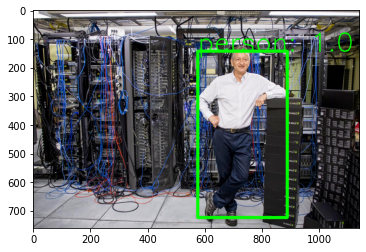

In [56]:
pred_class = get_predictions(pred, objects = 'person')
draw_box(pred_class,img)
del pred_class

In [57]:
get_predictions(pred,threshold=1, objects = 'person')

[]

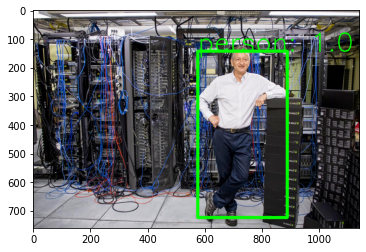

In [58]:
pred_thresh=get_predictions(pred,threshold=0.98,objects="person")
draw_box(pred_thresh,img)
del pred_thresh

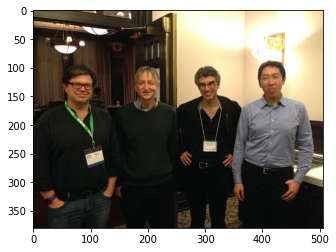

In [60]:
img_path='/content/image_people.png'
image = Image.open(img_path)
image.resize([int(half * s) for s in image.size])
plt.imshow(np.array(image))
plt.show()

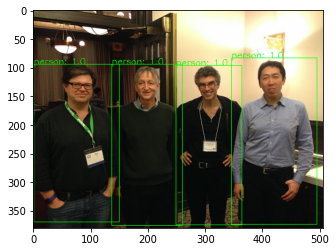

In [61]:
img = transform(image)
pred = model([img])
pred_thresh = get_predictions(pred,threshold=0.8)
draw_box(pred_thresh , img , rect_th= 1,text_size= 0.5,text_th=1)
del pred_thresh

In [ ]:
pred_obj=get_predictions(pred,objects="person")
draw_box(pred_obj,img,rect_th= 1,text_size= 0.5,text_th=1)
del pred_obj

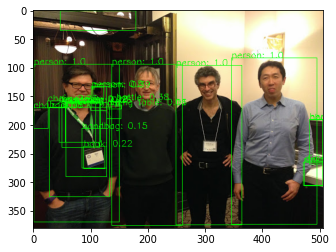

In [62]:
pred_thresh=get_predictions(pred,threshold=0.01)
draw_box(pred_thresh,img,rect_th= 1,text_size= 0.5,text_th=1)
del pred_thresh

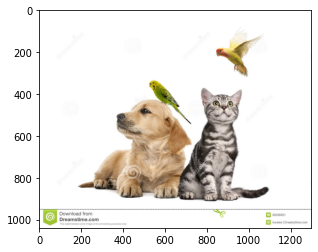

In [75]:
img_path = '/content/golden-retriever-puppy-lying-parakeet-perched-its-head-weeks-old-next-to-british-shorthair-kitten-sitting-30336051.jpg'
image = Image.open(img_path)
image.resize( [int(half * s) for s in image.size] )
plt.imshow(np.array(image))
plt.show()
del img_path


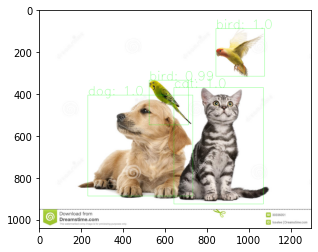

In [76]:
img = transform(image)
pred = model([img])
pred_thresh = get_predictions(pred, threshold = 0.97)
draw_box(pred_thresh, img,rect_th = 1, text_size=2, text_th=1)
del pred_thresh

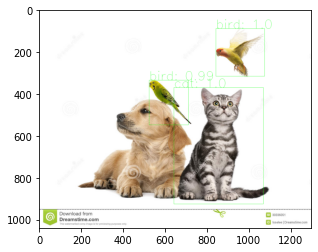

In [78]:

pred_obj = get_predictions(pred, objects =["bird", "cat"])
draw_box(pred_obj,img,rect_th= 1,text_size= 2,text_th=1)
del pred_obj